# Funções


In [3]:
import math

def f(t):
    "Função da vazão de água: f(t) = 500 * e^(-0.1 * t) * sin(0.5 * t)"
    return 500 * math.exp(-0.1 * t) * math.sin(0.5 * t)

def derivada_aproximada(f, t, h=0.1):
    "Aproximação da derivada com diferença central"
    return (f(t + h) - f(t - h)) / (2 * h)

def integral_trapezio(f, a, b, n=1000):
    "Integral pelo método dos trapézios"
    h = (b - a) / n
    soma = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        soma += f(a + i * h)
    return soma * h

print(f(1))
print(derivada_aproximada(f, 1))
print(integral_trapezio(f, 0, 10))

216.90108324556314
176.78123904306517
929.0369531600661


In [6]:
import pandas as pd

df = pd.read_csv('Danos_Informados.csv', sep=';', encoding='ISO-8859-1', skiprows=4)
print(df.head())

   UF                   Município    Registro                    Protocolo  \
0  SC             Alto Bela Vista  18/05/2025  SC-F-4200754-12300-20250518   
1  SC  Presidente Castello Branco  18/05/2025  SC-F-4213906-12300-20250518   
2  SC          Balneário Piçarras  15/04/2025  SC-F-4212809-12300-20250412   
3  SC           Capivari de Baixo  11/04/2025  SC-F-4203956-12300-20250410   
4  SC                      Laguna  11/04/2025  SC-F-4209409-12300-20250410   

               COBRADE    Status  População  DH_Mortos  DH_Feridos  \
0  12300 - Alagamentos  Registro       2005          0           0   
1  12300 - Alagamentos  Registro       1724          0           0   
2  12300 - Alagamentos  Registro      17074          0           0   
3  12300 - Alagamentos  Registro      21689          0           0   
4  12300 - Alagamentos  Registro      51554          0           0   

   DH_Enfermos  ...  PEPL_Telecomunicações (R$)  \
0            0  ...                         0.0   
1       

In [13]:
for idx, row in df[df['DH_Desabrigados'] > 0].iterrows():
    print(f"Cidade: {row['Município']} | Desabrigados: {row['DH_Desabrigados']}")

desabrigados_total = df['DH_Desabrigados'].sum()
if desabrigados_total > 10:
    print("ALERTA: Região historicamente vulnerável. Atenção redobrada.")

Cidade: Alto Bela Vista | Desabrigados: 11
Cidade: Santa Cecília | Desabrigados: 15
Cidade: Biguaçu | Desabrigados: 31
ALERTA: Região historicamente vulnerável. Atenção redobrada.


# Gráficos    

In [9]:
import matplotlib.pyplot as plt


def gerar_grafico_vazao():
    t_vals = [i * 0.1 for i in range(201)]
    f_vals = [f(t) for t in t_vals]
    
    plt.figure(figsize=(10,5))
    plt.plot(t_vals, f_vals, color='blue', label='Vazão de Água f(t)')
    plt.title("Vazão da Bacia de Contenção")
    plt.xlabel("Tempo (min)")
    plt.ylabel("Vazão (L/min)")
    plt.grid(True)
    plt.legend()
    plt.savefig("grafico_vazao.png")
    plt.show()

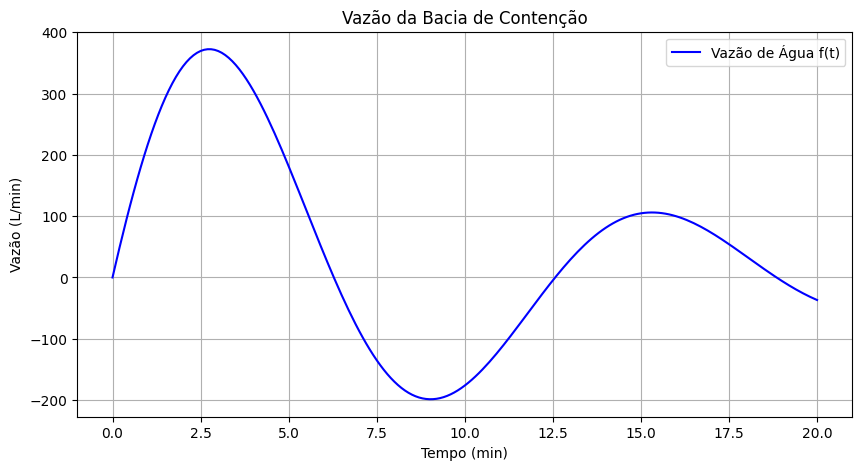

In [10]:
gerar_grafico_vazao()

# MAIN

=== SISTEMA DE MONITORAMENTO DE ENCHENTES ===

Gerando gráfico da vazão...


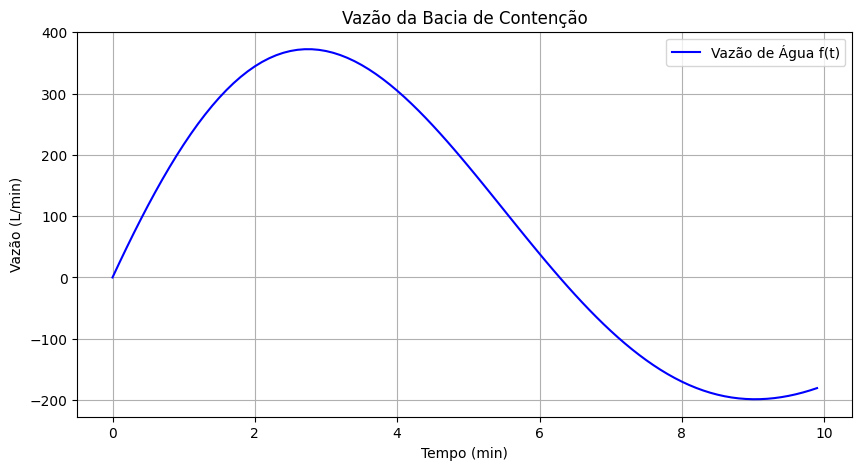


[INFO] Derivada f'(10): 43.70 L/min²
[INFO] Volume total acumulado entre 0 e 20 min: 1084.88 litros

[ALERTA] 🚨 ALERTA CRÍTICO: RISCO DE ENCHENTE DETECTADO!


In [7]:
import math
import matplotlib.pyplot as plt

def f(t):
    "Função da vazão de água: f(t) = 500 * e^(-0.1 * t) * sin(0.5 * t)"
    return 500 * math.exp(-0.1 * t) * math.sin(0.5 * t)

def derivada_aproximada(f, t, h=0.1):
    "Aproximação da derivada com diferença central"
    return (f(t + h) - f(t - h)) / (2 * h)

def integral_trapezio(f, a, b, n=1000):
    "Integral pelo método dos trapézios"
    h = (b - a) / n
    soma = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        soma += f(a + i * h)
    return soma * h

def gerar_grafico_vazao():
    t_vals = [i * 0.1 for i in range(100)]
    f_vals = [f(t) for t in t_vals]
    plt.figure(figsize=(10,5))
    plt.plot(t_vals, f_vals, color='blue', label='Vazão de Água f(t)')
    plt.title("Vazão da Bacia de Contenção")
    plt.xlabel("Tempo (min)")
    plt.ylabel("Vazão (L/min)")
    plt.grid(True)
    plt.legend()
    plt.savefig("grafico_vazao.png")
    plt.show()

def main():
    print("=== SISTEMA DE MONITORAMENTO DE ENCHENTES ===\n")
    
    # Pergunta ao responsável o limite de volume
    try:
        limite_volume = float(input("Informe o limite de volume de segurança (em litros): "))
    except ValueError:
        print("Valor inválido! Usando limite padrão de 10000 litros.")
        limite_volume = 10000

    # 1. Mostrar gráfico
    print("Gerando gráfico da vazão...")
    gerar_grafico_vazao()

    # 2. Derivada aproximada em t = 10
    derivada = derivada_aproximada(f, 10)
    print(f"\n[INFO] Derivada f'(10): {derivada:.2f} L/min²")

    # 3. Integral entre t = 0 e 20
    volume = integral_trapezio(f, 0, 20)
    print(f"[INFO] Volume total acumulado entre 0 e 20 min: {volume:.2f} litros")

    # 4. Emitir alerta
    with open("alerta.txt", "w", encoding="utf-8") as file:
        if volume > limite_volume:
            msg = "🚨 ALERTA CRÍTICO: RISCO DE ENCHENTE DETECTADO!"
        else:
            msg = "✅ Situação sob controle. Nenhum risco de enchente."
        file.write(msg)
        print(f"\n[ALERTA] {msg}")

if __name__ == "__main__":
    main()